In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df_ti=pd.read_excel('Consulta_20230622-185234029.xlsx')
df_pib=pd.read_excel('Indicadores20230623152744.xls')
df_mxn_x=pd.read_csv('MXN=X (2).csv')
df_indicadores=pd.read_excel('Indicadores20230622190157.xls')
df_fed=pd.read_csv('FEDFUNDS (1).csv')
df_reservas=pd.read_excel('Consulta_20230623-125314125.xlsx')
df_gdp=pd.read_csv('GDP.csv')
df_desmpleo_usa=pd.read_csv('UNRATE.csv')
df_cpi=pd.read_csv('CPIAUCSL.csv')

c:\Users\Pablo\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
df_reservas=df_reservas[['Banco de México','Unnamed: 1']]
df_reservas.rename(columns={'Banco de México':'Periodos',
                            'Unnamed: 1':'Reserva Extranjera'},inplace=True)
df_reservas.drop(df_reservas.index[0:11],inplace=True)
df_reservas['Periodos']=pd.to_datetime(df_reservas['Periodos'])
trimestres=df_reservas['Periodos'].dt.month.isin([3, 6, 9, 12])
df_reservas=df_reservas[trimestres]
df_reservas['Periodos'] = df_reservas['Periodos'] + pd.offsets.QuarterEnd()

In [12]:
periodos=df_reservas['Periodos']
periodos=pd.DataFrame({'Periodos':periodos}).reset_index(drop=True)

In [13]:
df_pib.rename(columns={'Instituto Nacional de Estadística y Geografía (INEGI)':'Periodos',
                            'Unnamed: 1':'PIB_pct'},inplace=True)
df_pib.drop(df_pib.index[0:4],inplace=True)
df_pib.dropna(inplace=True)
df_pib.drop(['Periodos'],axis=1,inplace=True)
df_pib.reset_index(drop=True,inplace=True)
df_pib=pd.concat([periodos,df_pib],axis=1)
df_pib['Periodos'] = df_pib['Periodos'] + pd.offsets.QuarterEnd()

In [14]:
df_gdp.rename(columns={'DATE':'Periodos',
               'GDP_PCH':'GPD_pct'},inplace=True)
df_gdp.drop(['Periodos'],axis=1,inplace=True)
df_gdp=pd.concat([periodos,df_gdp],axis=1)
df_gdp['Periodos'] = df_gdp['Periodos'] + pd.offsets.QuarterEnd()

In [15]:
df_cpi.rename(columns={'DATE':'Periodos','CPIAUCSL':'CPI'}, inplace=True)
df_cpi['Periodos']=pd.to_datetime(df_cpi['Periodos'])
trimestres=df_cpi['Periodos'].dt.month.isin([3,6,9,12])
df_cpi=df_cpi[trimestres]
df_cpi['Periodos'] = df_cpi['Periodos'] + pd.offsets.QuarterEnd()

In [16]:
df_desmpleo_usa.rename(columns={'DATE':'Periodos','FEDFUNDS':'Tasa Desmpleo USA'}, inplace=True)
df_desmpleo_usa['Periodos']=pd.to_datetime(df_desmpleo_usa['Periodos'])
trimestres=df_desmpleo_usa['Periodos'].dt.month.isin([3,6,9,12])
df_desmpleo_usa=df_desmpleo_usa[trimestres]
df_desmpleo_usa['Periodos'] = df_desmpleo_usa['Periodos'] + pd.offsets.QuarterEnd()

In [17]:
df_ti=df_ti.drop(df_ti.iloc[:,1:-1],axis=1)
df_ti.rename(columns={'Banco de México':'Periodos','Unnamed: 7':'Tasa de interes'},inplace= True)
df_ti.drop(df_ti.index[0:17], inplace=True)
df_ti=df_ti.loc[~df_ti['Tasa de interes'].isin(['N/E'])]

In [18]:
df_mxn_x=df_mxn_x.drop(df_mxn_x[['Open','High','Low','Adj Close','Volume']],axis=1)
df_mxn_x.rename(columns={'Date':'Periodos',
                         'Close':'MX=X'},inplace=True)

In [19]:
df_mxn_x.rename(columns={'Date':'Periodos',
                         'Close':'MX=X'},inplace=True)
df_indicadores.loc[3].values
df_indicadores.rename(columns={'Instituto Nacional de Estadística y Geografía (INEGI)':'Periodos',
                               'Unnamed: 1':'Tasa de ocupacion',
                               'Unnamed: 2':'INPC',
                               'Unnamed: 3':'Exportaciones (FOB)',
                               'Unnamed: 4':'Importaciones (FOB)',
                               'Unnamed: 5':'Balanza Comercial',
                               'Unnamed: 6':'Ingresos y egresos brutos'},inplace=True)
df_indicadores=df_indicadores.drop(['Exportaciones (FOB)','Importaciones (FOB)'],axis=1)
df_indicadores.drop(df_indicadores.index[0:4], inplace=True)
df_indicadores.drop(['Ingresos y egresos brutos'],axis=1, inplace=True)
df_indicadores=df_indicadores.dropna()
df_indicadores['Periodos']=pd.to_datetime(df_indicadores['Periodos'])
trimestres=df_indicadores['Periodos'].dt.month.isin([3, 6, 9, 12])
df_indicadores=df_indicadores[trimestres]
df_indicadores['Periodos'] = df_indicadores['Periodos'] + pd.offsets.QuarterEnd()

In [20]:
df_mxn_x['Periodos']=pd.to_datetime(df_mxn_x['Periodos'])
trimestres=df_mxn_x['Periodos'].dt.month.isin([3,6,9,12])
df_mxn_x=df_mxn_x[trimestres]
df_mxn_x['Periodos'] = df_mxn_x['Periodos'] + pd.offsets.QuarterEnd()

In [21]:
df_ti['Periodos']=pd.to_datetime(df_ti['Periodos'])
df_ti=df_ti.resample('Q', on='Periodos').last().reset_index()

In [22]:
df_fed.rename(columns={'DATE':'Periodos','FEDFUNDS':'Tasa Fed'}, inplace=True)
df_fed['Periodos']=pd.to_datetime(df_fed['Periodos'])
trimestres=df_fed['Periodos'].dt.month.isin([3,6,9,12])
df_fed=df_fed[trimestres]
df_fed['Periodos'] = df_fed['Periodos'] + pd.offsets.QuarterEnd()
fecha=pd.to_datetime('2023-03-31')
dato=4.33
datos={'Periodos':fecha,'Tasa Fed':dato}
df_fed=df_fed.append(datos,ignore_index=True)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_52716\1699872842.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fed=df_fed.append(datos,ignore_index=True)


In [23]:
def unir(df1,df2,columna,variable,join='inner'):
    globals()[variable]=pd.merge(df1,df2,how=join,on=columna)

In [24]:
unir(df_ti, df_mxn_x, 'Periodos', 'df_total', 'right')
unir(df_total,df_indicadores,'Periodos','df_total','right')
unir(df_total,df_fed,'Periodos','df_total','right')
unir(df_total,df_cpi,'Periodos','df_total','right')
unir(df_total,df_reservas,'Periodos','df_total','right')
unir(df_total,df_pib,'Periodos','df_total','right')
unir(df_total,df_gdp,'Periodos','df_total','right')
unir(df_total,df_desmpleo_usa,'Periodos','df_total','right')

In [25]:
df_total.dropna(inplace=True)
df_total=df_total.set_index('Periodos')

In [27]:
def grafico_lineal(data):
    for column in data:
        fig=px.line(x=data.index,y=data[column],
                    title=f'{column}',height=800,width=1200)
        fig.show()

In [28]:
grafico_lineal(df_total)

In [29]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2008-03-31 to 2023-03-31
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tasa de interes     61 non-null     float64
 1   MX=X                61 non-null     float64
 2   Tasa de ocupacion   61 non-null     object 
 3   INPC                61 non-null     object 
 4   Balanza Comercial   61 non-null     object 
 5   Tasa Fed            61 non-null     float64
 6   CPI                 61 non-null     float64
 7   Reserva Extranjera  61 non-null     object 
 8   PIB_pct             61 non-null     object 
 9   GPD_pct             61 non-null     float64
 10  UNRATE              61 non-null     float64
dtypes: float64(6), object(5)
memory usage: 5.7+ KB


In [30]:
def convertir_valores(data):
    if any(data.dtypes != 'float64'):
        data = data.apply(pd.to_numeric, errors='coerce')
    return data


In [31]:
df_total=convertir_valores(df_total)

In [72]:
df_total.describe().to_excel('descripcion_estadistica.xlsx', index=True)
df_total.describe()

,Tasa de interes,MX=X,Tasa de ocupacion,INPC,Balanza Comercial,Tasa Fed,CPI,Reserva Extranjera,PIB_pct,GPD_pct,UNRATE
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.00000,61.000000,61.000000
mean,5.553279,16.321623,59.468337,91.248804,338.231984,0.751475,243.059475,165329.596148,1.55059,0.980166,6.178689
std,2.018206,3.584158,1.265715,16.878043,1809.905573,1.019266,22.794233,37827.128831,4.61974,1.841201,2.179917
min,3.000000,10.299000,53.111205,66.019891,-3971.164000,0.070000,211.398000,81476.217000,-18.61400,-8.827640,3.500000
25%,4.250000,13.027310,59.243066,77.792385,-518.037000,0.100000,227.223000,149208.695000,1.17900,0.617950,4.300000
50%,4.500000,16.913639,59.711229,87.752419,147.159000,0.180000,237.657000,178008.699000,2.62100,1.060470,5.600000
75%,7.250000,19.639999,60.053019,103.476000,1001.516000,1.210000,255.159000,193331.800000,3.39100,1.430080,7.900000
max,11.250000,23.833000,61.471040,128.389000,6274.687000,4.330000,301.808000,212002.533000,19.61200,8.788110,11.000000


In [33]:
y=df_total['MX=X']

In [34]:
x=df_total.drop(['MX=X'],axis=1)

In [35]:
def correlacion(x, y):
    correlacion = x.corrwith(y).abs().sort_values(ascending=False)
    return correlacion

In [74]:
correlacion(x,y).to_excel('correlacion.xlsx', index=True)
correlacion(x,y)

INPC                  0.859404
CPI                   0.775686
Reserva Extranjera    0.696736
UNRATE                0.584170
Tasa de ocupacion     0.449930
Tasa de interes       0.329998
Tasa Fed              0.259633
Balanza Comercial     0.198155
PIB_pct               0.159689
GPD_pct               0.065667
dtype: float64

In [77]:
def tabla_correlacion(x, y):
    corr_matrix = correlacion(x, y)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlación respecto a {y.name}')
    plt.xlabel('Correlacion')
    plt.ylabel('Variable')
    plt.show()

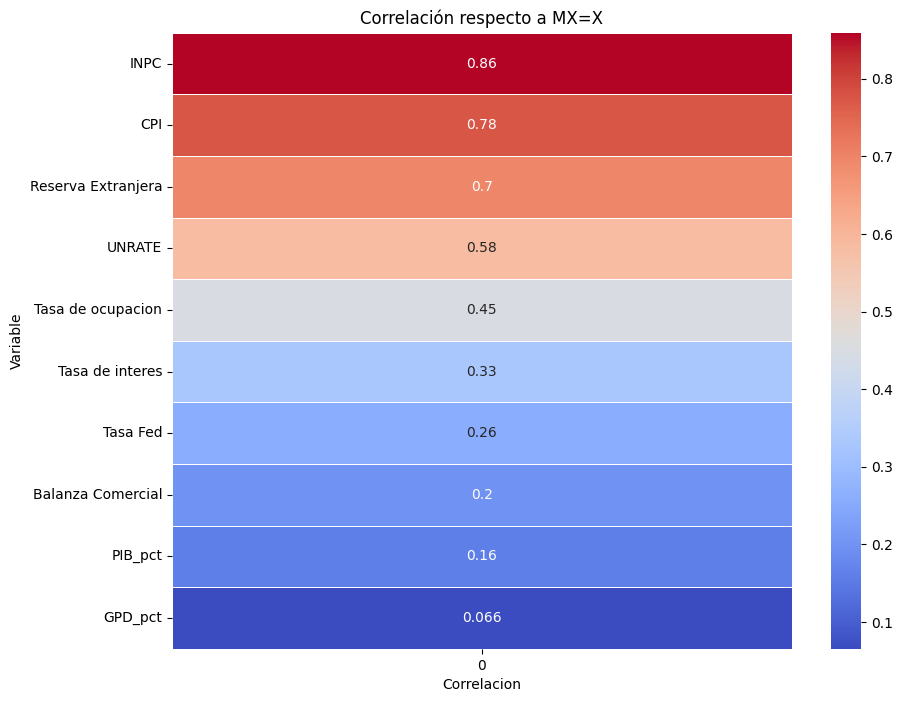

In [78]:
tabla_correlacion(x,y)

In [39]:
def dispersion(x,y):
    corr_matrix=correlacion(x,y)
    for column, correlation in corr_matrix.iteritems():
        fig = px.scatter(x=x[column], y=y, trendline='ols', title=f'Dispersión entre {column} y {y.name}',height=800,width=1200)
        fig.show()

In [40]:
dispersion(x,y)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_52716\3129074370.py:3: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [64]:
X_train,X_test,y_train,y_test=train_test_split(x[['INPC','CPI']],y,test_size=0.2,random_state=42)

In [63]:
num_col=[k for k, v in (x[['INPC','CPI']].dtypes!='object').to_dict().items() if v]

In [90]:
variables=Pipeline(
    steps=[
        ('imputer',IterativeImputer()),
        ('scaler',StandardScaler())
    ]
)
preprocesado=ColumnTransformer(
    transformers=[
        ('num',variables,num_col)
    ]
)
regresion=Pipeline(
    steps=[
        ('preprocesado',preprocesado),
        ('regresion',RandomForestRegressor())
    ]
)

In [102]:
regresion.fit(X_train,y_train)
pipe=make_pipeline(preprocesado,regresion)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['INPC', 'CPI'])])),
                ('pipeline',
                 Pipeline(steps=[('preprocesado',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['INPC',
                                                                    'CPI'])])),
                                 ('regresion', RandomForestRegressor())]))])

In [46]:
y_pred=regresion.predict(X_test)
r2_score(y_test,y_pred)

0.9501157692698131

In [103]:
importancia= regresion.named_steps['regresion'].feature_importances_
importancia=pd.DataFrame({'Variables':X_train.columns,
                              'Importancia':importancia}).sort_values(by='Importancia',ascending=False)
importancia.to_excel('importancia.xlsx',index=True)
importancia

,Variables,Importancia
0,INPC,0.688316
1,CPI,0.311684


In [68]:
def EvaluationMetric(Xt,yt,yp,disp="on"):
    MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=(np.sqrt(MSE))
    R2=(r2_score(y_true=yt,y_pred=yp))
    Adjusted_R2=(1-(1-r2_score(yt,yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
    if disp=="on":
        print("MSE: ",MSE,"RMSE :",RMSE)
        print("R2 :",R2,"ADJUSTED R2 :",Adjusted_R2)

    plt.figure(figsize=(18,6))  
    plt.plot((yp)[:100]) 
    plt.plot((np.array(yt)[:100]))
    plt.legend(["Prediccion","Real"])
    plt.title('Precio Real y Prediccion del modelo')

    return (MSE,RMSE,R2,Adjusted_R2)   

In [49]:
y_predt=regresion.predict(X_train)

MSE:  0.2208 RMSE : 0.4698936049788292
R2 : 0.9815251860996601 ADJUSTED R2 : 0.980704083259645


(0.2208, 0.4698936049788292, 0.9815251860996601, 0.980704083259645)

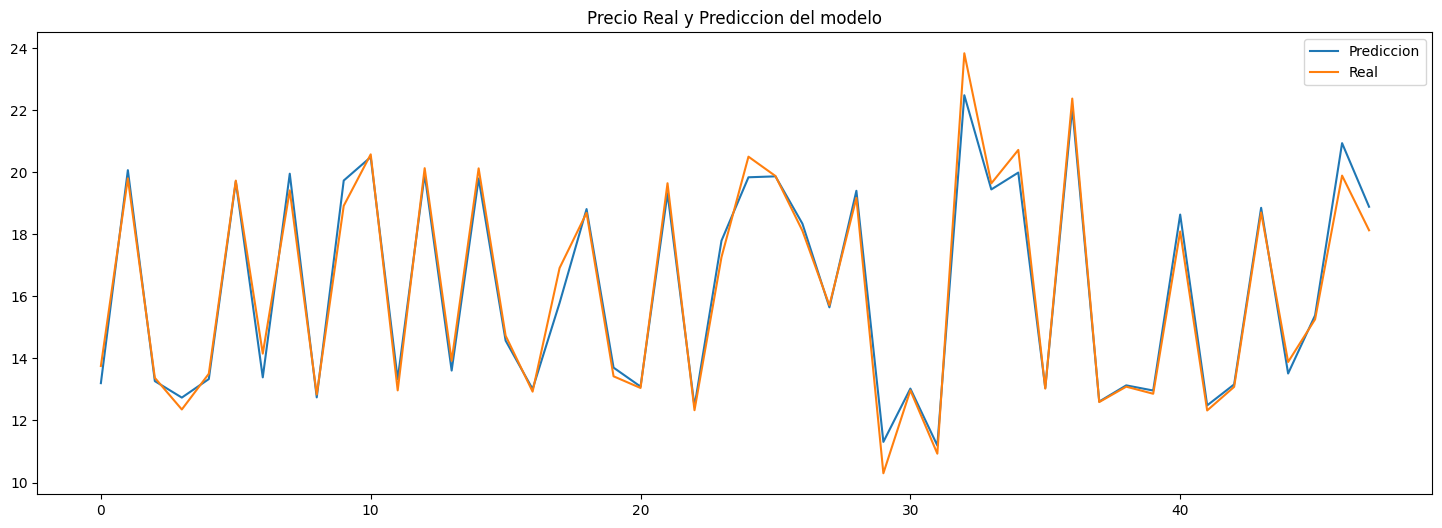

In [69]:
EvaluationMetric(X_train,y_train,y_predt)

In [104]:
predict=regresion.predict(X_test)
predict_df=pd.DataFrame(np.ravel(predict), columns=['Predicciones'])
predict_df.index = y_test.index  # Asignar los mismos índices que y_test al DataFrame predict_df
comparasion_df=pd.concat([y_test, predict_df], axis=1)
comparasion_df.columns = ['MX=X', 'Predicciones']
comparasion_df.round(2)
comparasion_df.to_excel('Comparasion.xlsx',index=True)
comparasion_df

,MX=X,Predicciones
Periodos,,
2008-03-31,10.635500,11.207503
2009-06-30,13.179000,13.764792
2019-09-30,19.678699,19.552014
2015-12-31,17.269760,16.696498
2011-06-30,11.711200,13.296581
2021-12-31,20.459101,20.238773
2016-09-30,19.368931,19.072759
2020-06-30,23.056570,22.474935
2011-03-31,11.891000,13.243269


Prueba unicamente para ver si podia predecir con ARIMA las variables y asi generar una prediccion con esas mismas.